### 1. Data Loading & Cleaning

In [1]:
import pandas as pd

# Load dataset
data_path = "C:/Users/yadav/Documents/Projects/ML-Algorithms-Tutorial/datasets/clustering/Mall_Customers.csv"
df = pd.read_csv(data_path)

# Initial data check
print(f"Dataset shape: {df.shape}")
print(df.info())
print(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())


Dataset shape: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Missing values:
 CustomerID

### 2. Exploratory Data Analysis (EDA)

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
count  200.000000  200.000000          200.000000              200.000000   
mean   100.500000   38.850000           60.560000               50.200000   
std     57.879185   13.969007           26.264721               25.823522   
min      1.000000   18.000000           15.000000                1.000000   
25%     50.750000   28.750000           41.500000               34.750000   
50%    100.500000   36.000000           61.500000               50.000000   
75%    150.250000   49.000000           78.000000               73.000000   
max    200.000000   70.000000          137.000000               99.000000   

          Cluster  
count  200.000000  
mean     2.255000  
std      2.210067  
min      0.000000  
25%      0.000000  
50%      2.000000  
75%      4.000000  
max      6.000000  


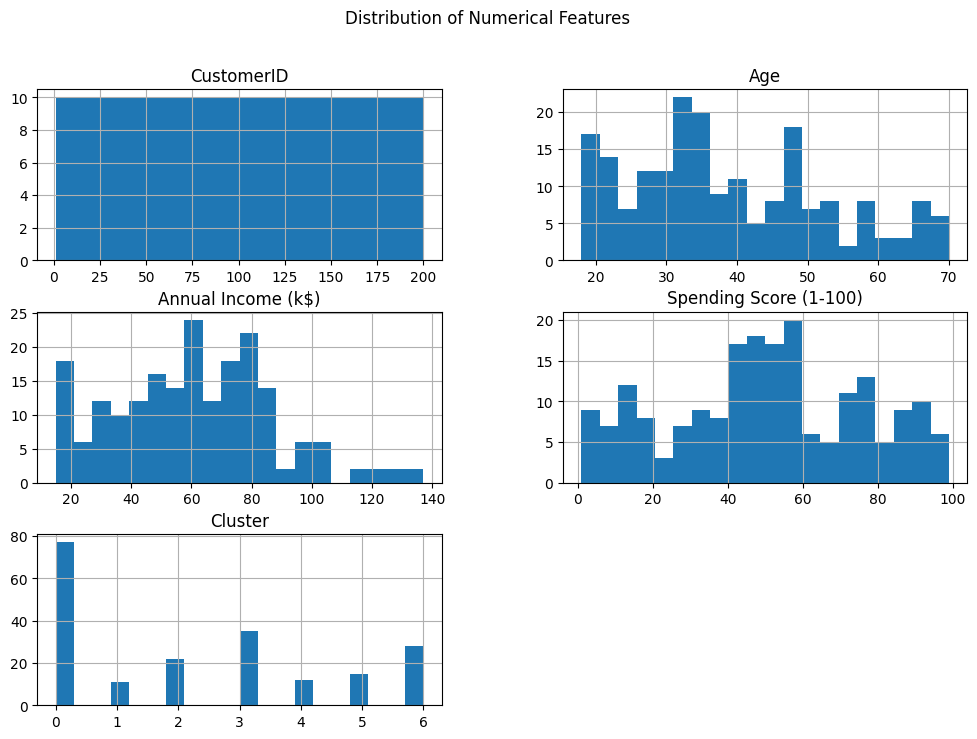

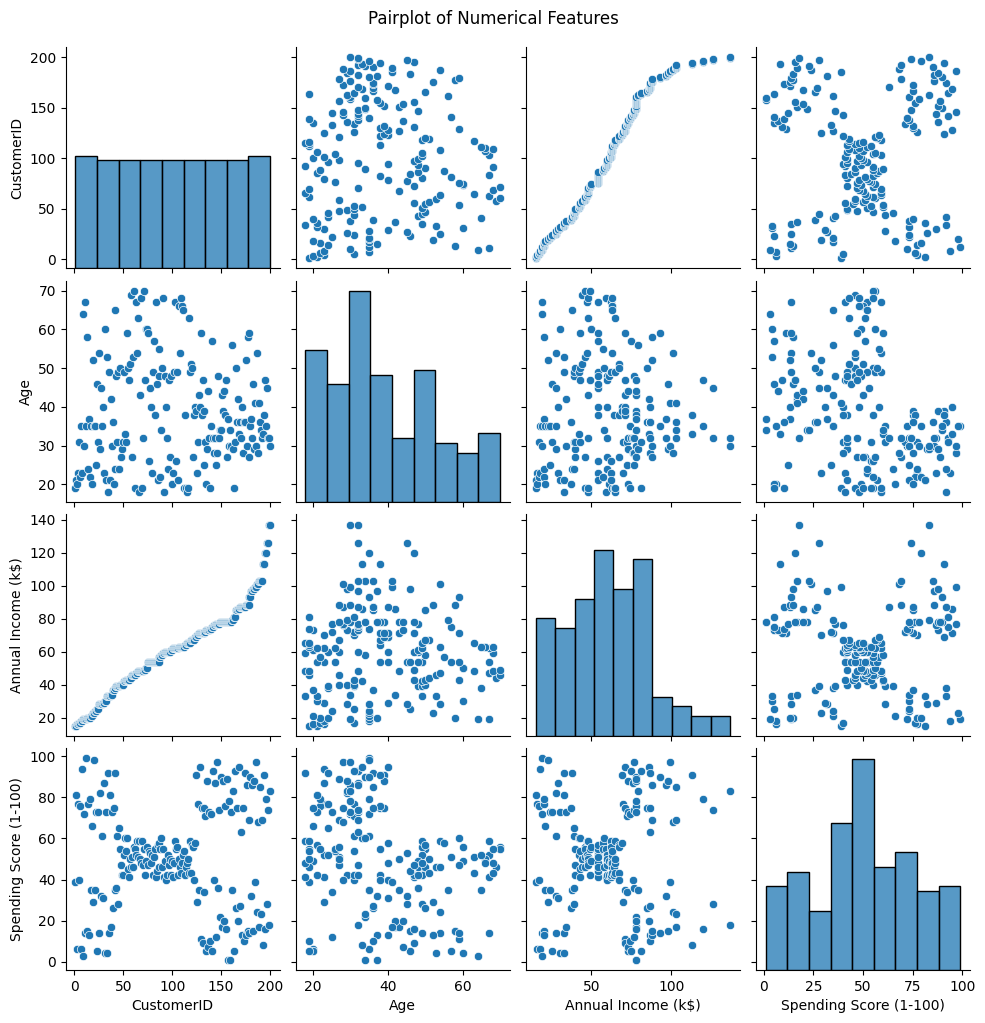

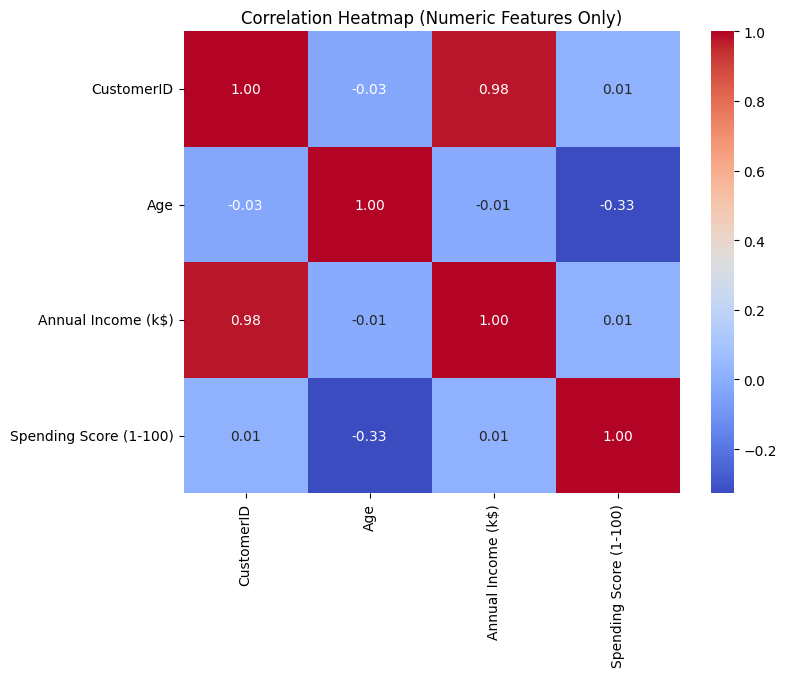

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary
print(df.describe())

# Histograms for numerical features
df.hist(bins=20, figsize=(12,8))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Pairplot (scatterplot matrix) for numerical variables
sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


### 3. Clustering Analysis

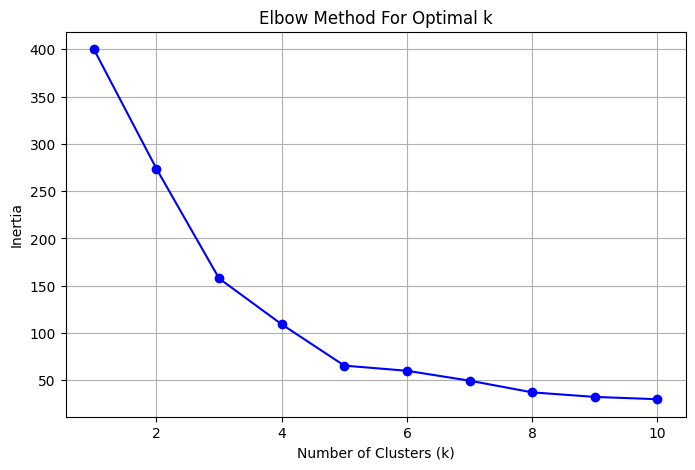

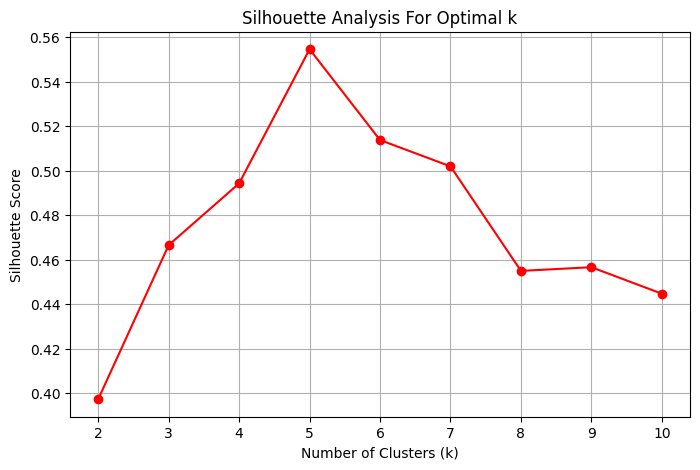

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Features for clustering (exclude CustomerID and Gender)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to determine optimal k
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Silhouette analysis to validate cluster numbers
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.grid(True)
plt.show()

# Choose optimal k (say, k=5 from plots)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = cluster_labels


### 4. Result Interpretation

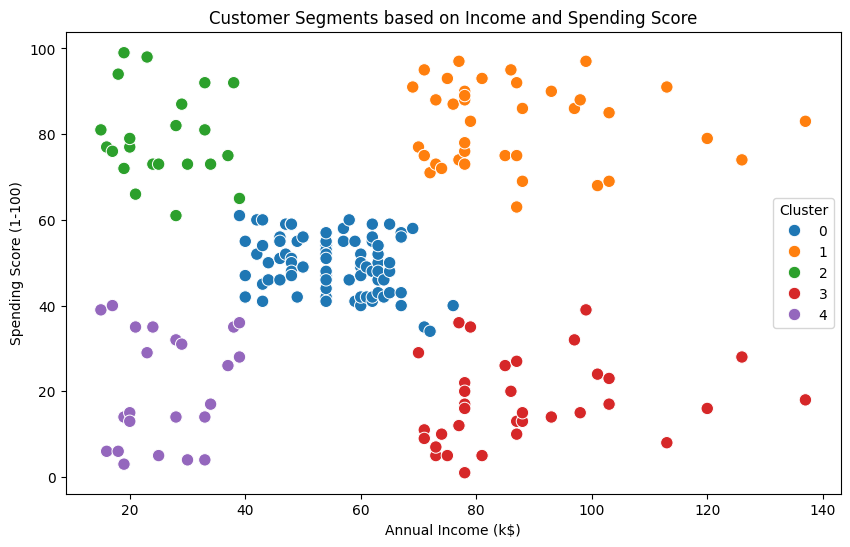

Cluster Centers:
    Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043
        Annual Income (k$)                   Spending Score (1-100)         \
                      mean median        std                   mean median   
Cluster                                                                      
0                55.296296   54.0   8.988109              49.518519   50.0   
1                86.538462   79.0  16.312485              82.128205   83.0   
2                25.727273   24.5   7.566731              79.363636   77.0   
3                88.200000   85.0  16.399067              17.114286   16.0   
4                26.304348   25.0   7.893811              20.913043   17.0   

                   Count  
               std count  
Cluster                   


In [4]:
import seaborn as sns

# Plot clusters with scatter plot
plt.figure(figsize=(10,6))
palette = sns.color_palette('tab10', optimal_k)
sns.scatterplot(
    x=X['Annual Income (k$)'],
    y=X['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette=palette,
    legend='full',
    s=80
)
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Cluster centers (scaled back to original scale)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=X.columns)
print("Cluster Centers:\n", centers_df)

# Cluster-wise summary statistics
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'median', 'std'],
    'Spending Score (1-100)': ['mean', 'median', 'std'],
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print(cluster_summary)


### 5. Hyperparameter Tuning (try different k values)

In [5]:
# Compare inertia and silhouette scores for different k already visualized above

# Additional try for k=3 and k=7 for comparison
for k in [3, 7]:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for k={k}: {sil_score:.4f}")


Silhouette Score for k=3: 0.4666
Silhouette Score for k=7: 0.5020


### 6. Export Results

In [ ]:
# output_path = "C:/Users/yadav/Documents/Projects/ML-Algorithms-Tutorial/outputs/mall_customers_clusters.csv"
# df.to_csv(output_path, index=False)
# print(f"Clustered data saved to {output_path}")


### 7. Interactive Dashboard with ipywidgets and plotly

In [6]:
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px

# Dropdown widget for cluster number selection
k_slider = widgets.IntSlider(value=5, min=2, max=10, step=1, description='Clusters (k):')

def plot_clusters(k):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    df['Cluster'] = labels
    centers = scaler.inverse_transform(km.cluster_centers_)

    fig = px.scatter(
        df,
        x='Annual Income (k$)',
        y='Spending Score (1-100)',
        color='Cluster',
        title=f'Customer Segmentation with k={k}',
        hover_data=['CustomerID'],
        color_continuous_scale='Viridis'
    )
    fig.show()

widgets.interact(plot_clusters, k=k_slider)


interactive(children=(IntSlider(value=5, description='Clusters (k):', max=10, min=2), Output()), _dom_classes=…

<function __main__.plot_clusters(k)>